In [220]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
warnings.simplefilter(action='ignore', category=FutureWarning)

In [221]:
data = pd.read_csv("Cleaned Data.csv", index_col=0)

In [222]:
data.head()

,Gender,Martial Status,No. of Childs,Education,Work,Pre_code,Post_code,item,department,brand,...,Gross Weight,Package Weight,Is Recyclable?,Min. Yearly Income,Store Area,Grocery Area,Frozen Area,Meat Area,Cost,Cost Class
0,Female,Single,4,bachelors,professional,H11go,ZA,cleaning supplies,household,red wing,...,28.1997,1.5990,1.0,10,2842.23,2037.640000,481.98,323.000000,602.7575,D
1,Female,Single,3,bachelors,management,S04ne,WA,snack foods,snack foods,nationeel,...,16.5710,1.5990,0.0,50,2814.95,2049.720000,457.36,328.464616,708.6650,E
2,Male,Married,2,high,manual,L05es,CA,magazines,periodicals,excel,...,28.6358,1.4536,1.0,30,2192.32,1322.210000,523.32,348.850000,564.2647,D
3,Female,Single,3,partial,professional,S03le,WA,dairy,dairy,carlson,...,14.2161,2.9217,1.0,30,1974.73,1775.439096,440.92,293.950000,724.5119,E
4,Female,Married,5,bachelors,professional,M10da,YU,vegetables,produce,hermanos,...,12.6172,2.9072,0.0,50,2862.30,1872.190000,593.93,395.950000,519.7574,C


In [223]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38829 entries, 0 to 6459
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              38829 non-null  object 
 1   Martial Status      38829 non-null  object 
 2   No. of Childs       38829 non-null  int64  
 3   Education           38829 non-null  object 
 4   Work                38829 non-null  object 
 5   Pre_code            38829 non-null  object 
 6   Post_code           38829 non-null  object 
 7   item                38827 non-null  object 
 8   department          38827 non-null  object 
 9   brand               38827 non-null  object 
 10  Video               38829 non-null  int64  
 11  Bar_for_Salad       38829 non-null  int64  
 12  Ready_food          38829 non-null  int64  
 13  Coffee              38829 non-null  int64  
 14  Florist             38829 non-null  int64  
 15  Promotion Name      38829 non-null  object 
 16  Store Kind

In [224]:
data['Store Kind'].unique()

array(['Deluxe', 'Supermarket', 'Gourmet', 'Mid-Size', 'Small Grocery'],
      dtype=object)

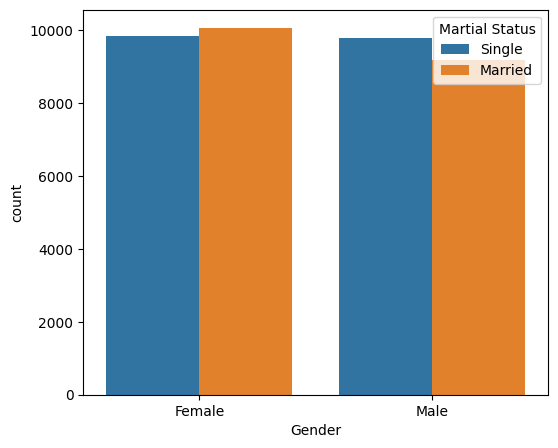

In [225]:
fig = plt.figure(figsize=(6,5))


sns.countplot(data=data,x = data['Gender'] ,hue=data['Martial Status']);

In [226]:
data['Min. Yearly Income'] = data['Min. Yearly Income'].agg(str)

In [227]:
# # fig = plt.figure(figsize=(6,5))
# def income(s):
#     return eval(s.split('K+')[0])

# data['Min. Yearly Income'] = pd.Series([income(i) for i in data['Min. Yearly Income']])

# data.head()

In [228]:
# yearlyIncome = pd.DataFrame(data.groupby('Store Kind')['Min. Yearly Income'].agg(np.mean))

# yearlyIncome

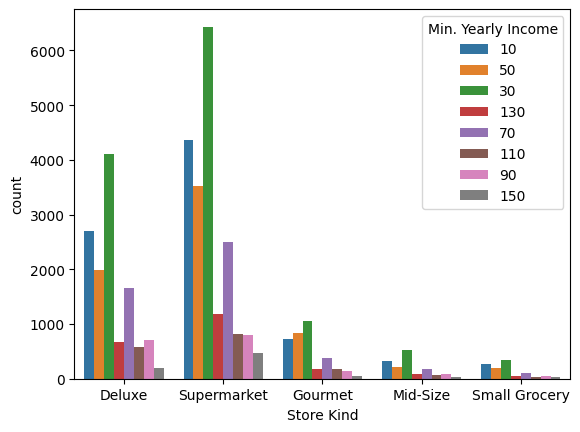

In [230]:
sns.countplot(data=data, x='Store Kind', hue='Min. Yearly Income');